In [145]:
import pandas as pd
df = pd.read_csv('boston.csv',header=0,delimiter=',',encoding='utf-8')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [147]:
df.shape

(506, 14)

In [148]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [149]:
#Câu 1
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [150]:
df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

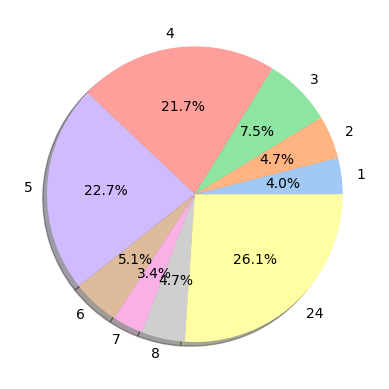

In [151]:
#Câu 2
gb = df.groupby(['RAD'])['RAD'].agg(['count'])
labels = gb.index 
data = list(gb['count'])
colors = sns.color_palette('pastel') # Tạo bảng màu
plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)
plt.show()

In [152]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [153]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [154]:
X = df[['AGE', 'LSTAT']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [155]:
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.1,random_state=10)

In [156]:
steps=[('model',LinearRegression())]
pipe = Pipeline(steps)
model = pipe.fit(X_train,y_train)
model

Pipeline(steps=[('model', LinearRegression())])

In [157]:
#Câu 3
X_train[1]

array([-0.01688776, -0.14060317])

In [158]:
X_test[1]

array([-2.08651304, -1.06855362])

In [159]:
coef = model.named_steps['model'].coef_
coef

array([ 0.84746824, -7.17167361])

In [160]:
#Câu 4
X_test.shape

(51, 2)

In [161]:
#Hệ số góc lstat
coefficients = coef
age_coefficient = coefficients[1]
print(age_coefficient)

-7.17167360616863


In [162]:
#Câu 5
model.named_steps['model'].intercept_

22.34596160488682

In [163]:
pd.DataFrame(y_train).tail(1)

,0
454,22.8


In [164]:
y_test_pred=pipe.predict(X_test)
y_train_pred=pipe.predict(X_train)

In [165]:
#Câu 6
print('Score or R-Squared: ', model.score(X_train,y_train))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Score or R-Squared:  0.5480883767100382
Mean Absolute Error:  4.379859308988405
Mean Squared Error:  36.66519836849953
Root Mean Squared Error:  6.055179466250322
Mean Absolute Percentage Error:  0.21484433461271807


In [166]:
#Câu 7
print('Score or R-Squared: ', model.score(X_test,y_test))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_test,y_test_pred))

Score or R-Squared:  0.5019088013216606
Mean Absolute Error:  5.185117026484556
Mean Squared Error:  49.31260662820101
Root Mean Squared Error:  7.02229354471892
Mean Absolute Percentage Error:  0.2012807931898763


In [167]:
#Câu 8
#Hãy cho biết dòng đầu tiên sau khi tiến hành chuẩn hóa dữ liệu (standardization) và 
#scaling dữ liệu về đoạn [0, 1] (transform) minmaxscaler trên tập dữ liệu input đầu vào 
standartScaler = StandardScaler()
X_standard_scaled = standartScaler.fit_transform(X)

minMaxScaler = MinMaxScaler()
X_minmax_scaled = minMaxScaler.fit_transform(X_standard_scaled)
X_minmax_scaled[0]

array([0.64160659, 0.08967991])

In [168]:
#Câu 9
pd.DataFrame(y_train).tail(1)

,0
454,22.8


In [169]:
#Hãy dự bảo giá trị medv khi biết giá trị của age và Istat lần lượt là 37.50 và 4.65
age = 37.50
istat = 4.65

predicted_Medv = pipe.predict([[age,istat]])
print('Giá trị dự báo: ',predicted_Medv)

Giá trị dự báo:  [20.77773844]
